In [1]:
# importing the libraries and the dependencies
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nltk


In [2]:
#loading the data
tweets = pd.read_csv('covid19_tweets.csv')
nrc = pd.read_csv("NRC.csv")
afinn = pd.read_csv("Afinn.csv",sep = "\t", encoding='latin')
covid = pd.read_csv("covid-19-all.csv") 
bing = pd.read_csv("Bing.csv")

## Covid19 data analysis

In [3]:
#data understanding
covid

Country/Region Province/State   Latitude   Longitude  Confirmed  \
0                    China          Anhui  31.825700  117.226400        1.0   
1                    China        Beijing  40.182400  116.414200       14.0   
2                    China      Chongqing  30.057200  107.874000        6.0   
3                    China         Fujian  26.078900  117.987400        1.0   
4                    China          Gansu  35.751800  104.286100        NaN   
...                    ...            ...        ...         ...        ...   
515795  West Bank and Gaza            NaN  31.952200   35.233200    15491.0   
515796      Western Sahara            NaN  24.215500  -12.885800       10.0   
515797               Yemen            NaN  15.552727   48.516388     1847.0   
515798              Zambia            NaN -13.133897   27.849332     8663.0   
515799            Zimbabwe            NaN -19.015438   29.154857     4990.0   

        Recovered  Deaths        Date  
0             NaN     NaN  2020-01-22  
1             NaN     NaN  2020-01-22  
2             NaN     NaN  2020-01-22  
3             NaN     NaN  2020-01-22  
4             NaN     NaN  2020-01-22  
...           ...     ...         ...  
515795     9186.0   106.0  2020-08-13  
515796        8.0     1.0  2020-08-13  
515797      949.0   528.0  2020-08-13  
515798     7401.0   246.0  2020-08-13  
515799     1927.0   128.0  2020-08-13  

[515800 rows x 8 columns]

In [4]:
#viewing the first 7 records of data
covid.head(7)

Country/Region Province/State  Latitude  Longitude  Confirmed  Recovered  \
0          China          Anhui   31.8257   117.2264        1.0        NaN   
1          China        Beijing   40.1824   116.4142       14.0        NaN   
2          China      Chongqing   30.0572   107.8740        6.0        NaN   
3          China         Fujian   26.0789   117.9874        1.0        NaN   
4          China          Gansu   35.7518   104.2861        NaN        NaN   
5          China      Guangdong   23.3417   113.4244       26.0        NaN   
6          China        Guangxi   23.8298   108.7881        2.0        NaN   

   Deaths        Date  
0     NaN  2020-01-22  
1     NaN  2020-01-22  
2     NaN  2020-01-22  
3     NaN  2020-01-22  
4     NaN  2020-01-22  
5     NaN  2020-01-22  
6     NaN  2020-01-22

In [5]:
#assessing the tweets data
tweets.head()

user_name         user_location  \
0           ᏉᎥ☻լꂅϮ            astroworld   
1    Tom Basile 🇺🇸          New York, NY   
2  Time4fisticuffs      Pewee Valley, KY   
3      ethel mertz  Stuck in the Middle    
4         DIPR-J&K     Jammu and Kashmir   

                                    user_description         user_created  \
0  wednesday addams as a disney princess keepin i...  2017-05-26 05:46:42   
1  Husband, Father, Columnist & Commentator. Auth...  2009-04-16 20:06:23   
2  #Christian #Catholic #Conservative #Reagan #Re...  2009-02-28 18:57:41   
3  #Browns #Indians #ClevelandProud #[]_[] #Cavs ...  2019-03-07 01:45:06   
4  🖊️Official Twitter handle of Department of Inf...  2017-02-12 06:45:15   

   user_followers  user_friends  user_favourites  user_verified  \
0             624           950            18775          False   
1            2253          1677               24           True   
2            9275          9525             7254          False   
3             197           987             1488          False   
4          101009           168              101          False   

                  date                                               text  \
0  2020-07-25 12:27:21  If I smelled the scent of hand sanitizers toda...   
1  2020-07-25 12:27:17  Hey @Yankees @YankeesPR and @MLB - wouldn't it...   
2  2020-07-25 12:27:14  @diane3443 @wdunlap @realDonaldTrump Trump nev...   
3  2020-07-25 12:27:10  @brookbanktv The one gift #COVID19 has give me...   
4  2020-07-25 12:27:08  25 July : Media Bulletin on Novel #CoronaVirus...   

                            hashtags               source  is_retweet  
0                                NaN   Twitter for iPhone       False  
1                                NaN  Twitter for Android       False  
2                        ['COVID19']  Twitter for Android       False  
3                        ['COVID19']   Twitter for iPhone       False  
4  ['CoronaVirusUpdates', 'COVID19']  Twitter for Android       False

## Preprocessing


In [6]:
#checking for missing values for the covid data
covid.isna().sum()

Country/Region        0
Province/State    28465
Latitude              1
Longitude             1
Confirmed            19
Recovered           388
Deaths              441
Date                  0
dtype: int64

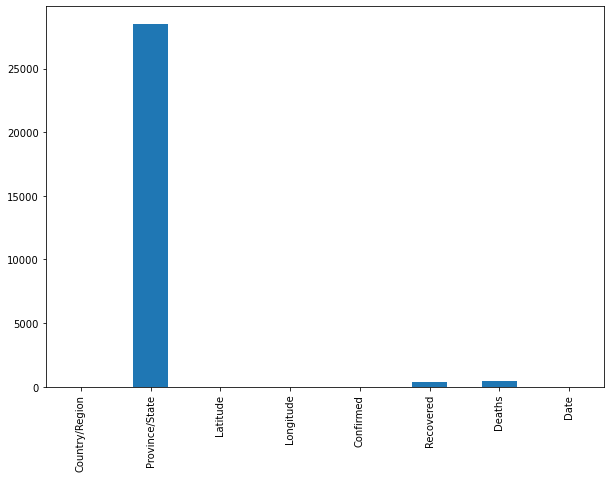

In [7]:
#visualization of the missing values
plt.figure(figsize=(10,7))
covid.isnull().sum().plot.bar()
plt.show()

In [8]:
#checking for missing values for the tweets data
tweets.isna().sum()

user_name               0
user_location       36771
user_description    10286
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags            51334
source                 77
is_retweet              0
dtype: int64

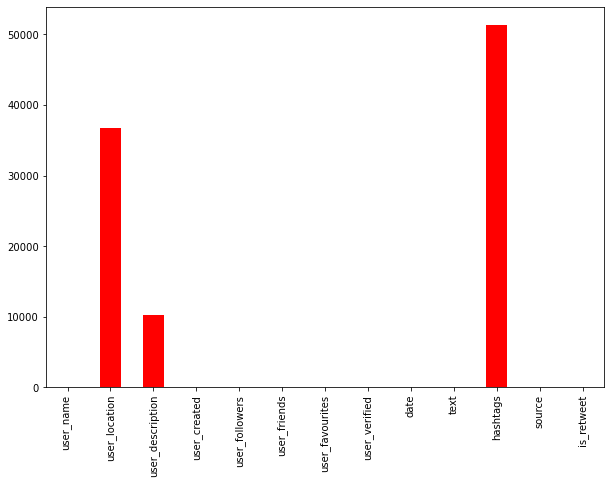

In [9]:
#visualization of the missing values
plt.figure(figsize=(10,7))
tweets.isnull().sum().plot.bar(color='red')
plt.show()

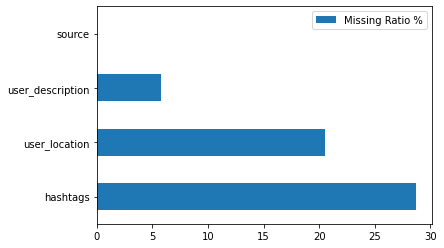

In [10]:
import matplotlib.pyplot as plt
def plot_nas(tweets: pd.DataFrame):
    if tweets.isnull().sum().sum() != 0:
        na_df = (tweets.isnull().sum() / len(tweets)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "barh")
        plt.show()
    else:
        print('No NAs found')
plot_nas(tweets)

In [11]:
#cleaning the data by dropping null values
covid1 = covid.dropna()
tweets1 = tweets.dropna()

## Worldwide situation 

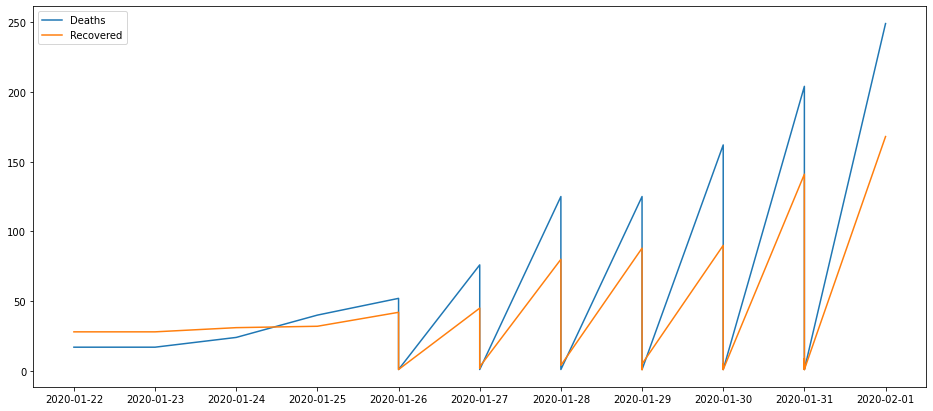

In [60]:
#analysis of how the covid affected the world in terms of deaths and recovery
plt.figure(figsize=(16,7))
plt.plot(covid1['Date'][:30],covid1['Deaths'][:30],label='Deaths')
plt.plot(covid1['Date'][:30],covid1['Recovered'][:30],label='Recovered')
plt.legend()
plt.show()

In [13]:
covid1.dtypes

Country/Region     object
Province/State     object
Latitude          float64
Longitude         float64
Confirmed         float64
Recovered         float64
Deaths            float64
Date               object
dtype: object

## Top Countries per Case Type

In [14]:
covid1['Deaths']

13          17.0
51          17.0
84          24.0
125         40.0
169         52.0
           ...  
515786     557.0
515787    2491.0
515788       2.0
515789       0.0
515790    1586.0
Name: Deaths, Length: 486974, dtype: float64

In [15]:
covid1['Country/Region'].unique

<bound method Series.unique of 13                 China
51                 China
84                 China
125                China
169                China
               ...      
515786    United Kingdom
515787    United Kingdom
515788    United Kingdom
515789    United Kingdom
515790    United Kingdom
Name: Country/Region, Length: 486974, dtype: object>

In [16]:
deaths_by_country = covid1[['Country/Region','Deaths']].groupby('Country/Region',)

deaths_by_country.first()

Deaths
Country/Region             
Australia               0.0
Austria                 0.0
Brazil                 76.0
Canada                  0.0
Chile                  17.0
China                  17.0
Colombia               57.0
Cruise Ship             7.0
Denmark                 0.0
France                 48.0
Germany              1629.0
Hong Kong               0.0
India                   0.0
Iraq                    0.0
Israel                  0.0
Italy                 379.0
Japan                  34.0
Lebanon                 0.0
Macau                   0.0
Mexico                 21.0
Netherlands            24.0
Others                  0.0
Pakistan                9.0
Peru                   21.0
Russia                  9.0
Spain                1336.0
Sweden                  5.0
Taipei and environs     1.0
Taiwan                  0.0
US                      0.0
Ukraine                16.0
United Kingdom          8.0

## Text Preparation

In [17]:
# tweet data
df = tweets1
df

user_name         user_location  \
2              Time4fisticuffs      Pewee Valley, KY   
3                  ethel mertz  Stuck in the Middle    
4                     DIPR-J&K     Jammu and Kashmir   
5             🎹 Franz Schubert           Новоро́ссия   
6                 hr bartender       Gainesville, FL   
...                        ...                   ...   
179101       New Jersey Herald            Newton, NJ   
179102                    Pris                  T.O.   
179103  AJIMATI AbdulRahman O.       Ilorin, Nigeria   
179104                   Jason               Ontario   
179106           Gary DelPonte         New York City   

                                         user_description  \
2       #Christian #Catholic #Conservative #Reagan #Re...   
3       #Browns #Indians #ClevelandProud #[]_[] #Cavs ...   
4       🖊️Official Twitter handle of Department of Inf...   
5       🎼  #Новоро́ссия #Novorossiya #оставайсядома #S...   
6       Workplace tips and advice served up in a frien...   
...                                                   ...   
179101  The New Jersey Herald, a daily newspaper in Ne...   
179102  A/V/L Techie, camera op. but twitter has becom...   
179103    Animal Scientist|| Muslim|| Real Madrid/Chelsea   
179104  When your cat has more baking soda than Ninja ...   
179106  Global UX UI Visual Designer. StoryTeller, Mus...   

               user_created  user_followers  user_friends  user_favourites  \
2       2009-02-28 18:57:41            9275          9525             7254   
3       2019-03-07 01:45:06             197           987             1488   
4       2017-02-12 06:45:15          101009           168              101   
5       2018-03-19 16:29:52            1180          1071             1287   
6       2008-08-12 18:19:49           79956         54810             3801   
...                     ...             ...           ...              ...   
179101  2010-01-07 18:19:37            6274           162               38   
179102  2008-12-31 16:16:12             251           160              627   
179103  2013-12-30 18:59:19             412          1609             1062   
179104  2011-12-21 04:41:30             150           182             7295   
179106  2009-10-27 17:43:13            1338          1111                0   

        user_verified                 date  \
2               False  2020-07-25 12:27:14   
3               False  2020-07-25 12:27:10   
4               False  2020-07-25 12:27:08   
5               False  2020-07-25 12:27:06   
6               False  2020-07-25 12:27:03   
...               ...                  ...   
179101          False  2020-08-29 19:44:27   
179102          False  2020-08-29 19:44:23   
179103          False  2020-08-29 19:44:21   
179104          False  2020-08-29 19:44:16   
179106          False  2020-08-29 19:44:14   

                                                     text  \
2       @diane3443 @wdunlap @realDonaldTrump Trump nev...   
3       @brookbanktv The one gift #COVID19 has give me...   
4       25 July : Media Bulletin on Novel #CoronaVirus...   
5       #coronavirus #covid19 deaths continue to rise....   
6       How #COVID19 Will Change Work in General (and ...   
...                                                   ...   
179101  Wallkill school nurse adds COVID-19 monitoring...   
179102  we have reached 25mil cases of #covid19, world...   
179103  Thanks @IamOhmai for nominating me for the @WH...   
179104  2020! The year of insanity! Lol! #COVID19 http...   
179106  More than 1,200 students test positive for #CO...   

                                               hashtags               source  \
2                                           ['COVID19']  Twitter for Android   
3                                           ['COVID19']   Twitter for iPhone   
4                     ['CoronaVirusUpdates', 'COVID19']  Twitter for Android   
5                            ['coronavirus', 'covid19']      Twitter Web

In [18]:
#dropping unnecessary columns
#df = tweets1.drop(columns=['source','is_retweet','user_name','user_location','user_name','user_location','user_description','user_created','user_followers','user_friends','user_favourites','user_verified'])

In [19]:
# Plot the top value_counts
df['source'].value_counts().nlargest(30)

Twitter Web App            32291
Twitter for Android        21462
Twitter for iPhone         18573
TweetDeck                   5392
Hootsuite Inc.              4268
Twitter for iPad            2441
Buffer                      1693
Instagram                   1212
Sprout Social               1152
IFTTT                        792
LinkedIn                     422
WordPress.com                416
Twitter Media Studio         416
FS Poster                    403
Sprinklr                     350
GlobalPandemic.NET           320
HubSpot                      293
Blood Donors India           281
Paper.li                     252
Dynamic Signal               221
Twitter for Advertisers      206
dlvr.it                      204
HN_Comments                  191
Fabrik.fm                    174
IAMBLOG2TWITTER              129
ContentStudio.io             118
rate_twitte                  116
Tweetbot for iΟS             116
Twitter for Mac              115
Zoho Social                  113
Name: sour

In [20]:
#shape of the new data

df.shape

(99138, 13)

## Tasks
Text
Text Preprocessing
Sentiment Analysis
Keyword Extraction
Entity Extraction

<AxesSubplot:>

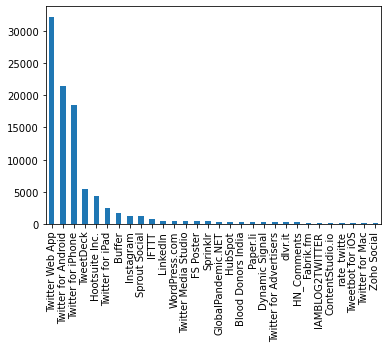

In [21]:
# Plot the top value_counts
df['source'].value_counts().nlargest(30).plot(kind='bar')

## Text Analysis of tweet

In [22]:
!pip install neattext

In [23]:
# Load Text Cleaning Package
import neattext.functions as nfx

## Noise
remove mentions/userhandles
remove hashtags
urls
emojis
special char

In [24]:
df['text'].apply(nfx.extract_hashtags)
df['extracted_hashtags'] = df['text'].apply(nfx.extract_hashtags)
df[['extracted_hashtags','hashtags']]

C:\Users\admin\AppData\Local\Temp\ipykernel_5236\1100274181.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['extracted_hashtags'] = df['text'].apply(nfx.extract_hashtags)


extracted_hashtags  \
2                                         [#COVID19]   
3                                         [#COVID19]   
4                    [#CoronaVirusUpdates, #COVID19]   
5                           [#coronavirus, #covid19]   
6                           [#COVID19, #Recruiting…]   
...                                              ...   
179101  [#nurses, #COVID19, #coronavirus, #schools…]   
179102                                   [#covid19,]   
179103                                  [#WearAMask]   
179104                                    [#COVID19]   
179106                                    [#COVID19]   

                                               hashtags  
2                                           ['COVID19']  
3                                           ['COVID19']  
4                     ['CoronaVirusUpdates', 'COVID19']  
5                            ['coronavirus', 'covid19']  
6                             ['COVID19', 'Recruiting']  
...                                                 ...  
179101  ['nurses', 'COVID19', 'coronavirus', 'schools']  
179102                                      ['covid19']  
179103                                    ['WearAMask']  
179104                                      ['COVID19']  
179106                                      ['COVID19']  

[99138 rows x 2 columns]

In [25]:
# Cleaning Text
df['clean_tweet'] = df['text'].apply(nfx.remove_hashtags)
df[['text','clean_tweet']]

C:\Users\admin\AppData\Local\Temp\ipykernel_5236\1472330032.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_tweet'] = df['text'].apply(nfx.remove_hashtags)


text  \
2       @diane3443 @wdunlap @realDonaldTrump Trump nev...   
3       @brookbanktv The one gift #COVID19 has give me...   
4       25 July : Media Bulletin on Novel #CoronaVirus...   
5       #coronavirus #covid19 deaths continue to rise....   
6       How #COVID19 Will Change Work in General (and ...   
...                                                   ...   
179101  Wallkill school nurse adds COVID-19 monitoring...   
179102  we have reached 25mil cases of #covid19, world...   
179103  Thanks @IamOhmai for nominating me for the @WH...   
179104  2020! The year of insanity! Lol! #COVID19 http...   
179106  More than 1,200 students test positive for #CO...   

                                              clean_tweet  
2       @diane3443 @wdunlap @realDonaldTrump Trump nev...  
3       @brookbanktv The one gift   has give me is an ...  
4       25 July : Media Bulletin on Novel     \n@kansa...  
5           deaths continue to rise. It's almost  as b...  
6       How   Will Change Work in General (and recruit...  
...                                                   ...  
179101  Wallkill school nurse adds COVID-19 monitoring...  
179102  we have reached 25mil cases of   worldwide. oo...  
179103  Thanks @IamOhmai for nominating me for the @WH...  
179104  2020! The year of insanity! Lol!   https://t.c...  
179106  More than 1,200 students test positive for   a...  

[99138 rows x 2 columns]

In [26]:
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: nfx.remove_userhandles(x))
df[['text','clean_tweet']]

C:\Users\admin\AppData\Local\Temp\ipykernel_5236\3407609976.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_tweet'] = df['clean_tweet'].apply(lambda x: nfx.remove_userhandles(x))


text  \
2       @diane3443 @wdunlap @realDonaldTrump Trump nev...   
3       @brookbanktv The one gift #COVID19 has give me...   
4       25 July : Media Bulletin on Novel #CoronaVirus...   
5       #coronavirus #covid19 deaths continue to rise....   
6       How #COVID19 Will Change Work in General (and ...   
...                                                   ...   
179101  Wallkill school nurse adds COVID-19 monitoring...   
179102  we have reached 25mil cases of #covid19, world...   
179103  Thanks @IamOhmai for nominating me for the @WH...   
179104  2020! The year of insanity! Lol! #COVID19 http...   
179106  More than 1,200 students test positive for #CO...   

                                              clean_tweet  
2             Trump never once claimed   was a hoax. W...  
3         The one gift   has give me is an appreciatio...  
4       25 July : Media Bulletin on Novel     \n      ...  
5           deaths continue to rise. It's almost  as b...  
6       How   Will Change Work in General (and recruit...  
...                                                   ...  
179101  Wallkill school nurse adds COVID-19 monitoring...  
179102  we have reached 25mil cases of   worldwide. oo...  
179103  Thanks   for nominating me for the     challen...  
179104  2020! The year of insanity! Lol!   https://t.c...  
179106  More than 1,200 students test positive for   a...  

[99138 rows x 2 columns]

In [27]:
df['clean_tweet'].iloc[10]

'Second wave of   in Flanders..back to more   again... https://t.co/9swImZACMN'

In [28]:
# Cleaning Text: Multiple WhiteSpaces
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_multiple_spaces)

C:\Users\admin\AppData\Local\Temp\ipykernel_5236\2387717086.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_multiple_spaces)


In [29]:
df['clean_tweet'].iloc[10]

'Second wave of in Flanders..back to more again... https://t.co/9swImZACMN'

In [30]:
# Cleaning Text : Remove urls
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_urls)

C:\Users\admin\AppData\Local\Temp\ipykernel_5236\3431476915.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_urls)


In [31]:
# Cleaning Text: Punctuations
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_puncts)

C:\Users\admin\AppData\Local\Temp\ipykernel_5236\4267239414.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_puncts)


In [32]:
df[['text','clean_tweet']]

text  \
2       @diane3443 @wdunlap @realDonaldTrump Trump nev...   
3       @brookbanktv The one gift #COVID19 has give me...   
4       25 July : Media Bulletin on Novel #CoronaVirus...   
5       #coronavirus #covid19 deaths continue to rise....   
6       How #COVID19 Will Change Work in General (and ...   
...                                                   ...   
179101  Wallkill school nurse adds COVID-19 monitoring...   
179102  we have reached 25mil cases of #covid19, world...   
179103  Thanks @IamOhmai for nominating me for the @WH...   
179104  2020! The year of insanity! Lol! #COVID19 http...   
179106  More than 1,200 students test positive for #CO...   

                                              clean_tweet  
2        Trump never once claimed was a hoax We all cl...  
3        The one gift has give me is an appreciation f...  
4                      25 July : Media Bulletin on Novel   
5        deaths continue to rise Its almost as bad as ...  
6       How Will Change Work in General (and recruitin...  
...                                                   ...  
179101  Wallkill school nurse adds COVID19 monitoring ...  
179102     we have reached 25mil cases of worldwide oof\n  
179103  Thanks for nominating me for the challenge I n...  
179104                     2020 The year of insanity Lol   
179106  More than 1200 students test positive for at m...  

[99138 rows x 2 columns]

## Sentiment Analysis


In [33]:
!pip install textblob

In [34]:
from textblob import TextBlob

In [35]:
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment_polarity = blob.sentiment.polarity
    sentiment_subjectivity = blob.sentiment.subjectivity
    if sentiment_polarity > 0:
        sentiment_label = 'Positive'
    elif sentiment_polarity < 0:
        sentiment_label = 'Negative'
    else:
        sentiment_label = 'Neutral'
    result = {'polarity':sentiment_polarity,
              'subjectivity':sentiment_subjectivity,
              'sentiment':sentiment_label}
    return result

In [36]:
# Text
ex1 = df['clean_tweet'].iloc[0]
get_sentiment(ex1)

{'polarity': 0.0, 'subjectivity': 0.0, 'sentiment': 'Neutral'}

In [37]:
df['sentiment_results'] = df['clean_tweet'].apply(get_sentiment)
df['sentiment_results']

C:\Users\admin\AppData\Local\Temp\ipykernel_5236\2370766301.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment_results'] = df['clean_tweet'].apply(get_sentiment)


2         {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
3         {'polarity': 0.0, 'subjectivity': 0.3571428571...
4         {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
5         {'polarity': -0.6999999999999998, 'subjectivit...
6         {'polarity': 0.05000000000000002, 'subjectivit...
                                ...                        
179101    {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
179102    {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
179103    {'polarity': 0.2, 'subjectivity': 0.2, 'sentim...
179104    {'polarity': 0.8, 'subjectivity': 0.7, 'sentim...
179106    {'polarity': 0.26325757575757575, 'subjectivit...
Name: sentiment_results, Length: 99138, dtype: object

In [38]:
df['sentiment_results'].iloc[0]

{'polarity': 0.0, 'subjectivity': 0.0, 'sentiment': 'Neutral'}

In [39]:
pd.json_normalize(df['sentiment_results'].iloc[0])

polarity  subjectivity sentiment
0       0.0           0.0   Neutral

In [40]:
df = df.join(pd.json_normalize(df['sentiment_results']))

In [41]:
df['sentiment'].value_counts()

Neutral     24291
Positive    22273
Negative     8492
Name: sentiment, dtype: int64

<AxesSubplot:>

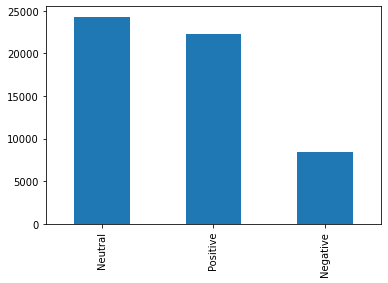

In [42]:
df['sentiment'].value_counts().plot(kind='bar')

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentiment', ylabel='count'>

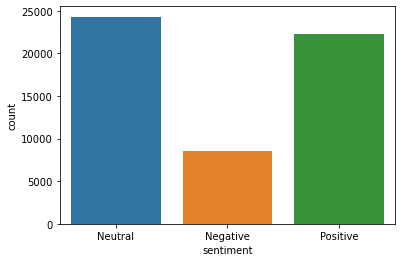

In [43]:
# Plot with seaborn
sns.countplot(df['sentiment'])

### Keyword Extraction
+ For Positive and Negative Sentiment
+ General


In [44]:
positive_tweet = df[df['sentiment'] == 'Positive']['clean_tweet']
neutral_tweet = df[df['sentiment'] == 'Neutral']['clean_tweet']
negative_tweet = df[df['sentiment'] == 'Negative']['clean_tweet']
positive_tweet

4                       25 July : Media Bulletin on Novel 
11                                           Order here:  
17           Second wave of in Flandersback to more again 
26       Our Munitions Response Team in modified ops an...
28        crosses 2 lakh mark and 150055 ppp has recove...
                               ...                        
99100          will fail unless government pays wages say 
99115    The is showing We reject cheating putting kids...
99121    Got 10 minutes If you’re serving communities d...
99127                Do you know your strengths\nFollow:  
99135    Share your thoughts on The New Normal: The Imp...
Name: clean_tweet, Length: 22273, dtype: object

In [45]:
# Remove Stopwords and Convert to Tokens
positive_tweet_list = positive_tweet.apply(nfx.remove_stopwords).tolist()

In [46]:
negative_tweet_list = negative_tweet.apply(nfx.remove_stopwords).tolist()
neutral_tweet_list = neutral_tweet.apply(nfx.remove_stopwords).tolist()

## Tokenization

In [47]:

for line in positive_tweet_list:
#     print(line)
    for token in line.split():
        print(token)

25
July
:
Media
Bulletin
Novel
Order
here:
Second
wave
Flandersback
Munitions
Response
Team
modified
ops
adopted
masks
disinfectants
sanitizers…
crosses
2
lakh
mark
150055
ppp
recovered
far
positive
today
6988/total…
“Regarding
community
outbreak
Haida
Gwaii:
13
cases
(one
recover…
understood
hadnt
missed
meeting
In…
Volume
🔊
reports
1142
positive
cases
29
deaths
Saturday
Death
toll
rises
3806
reports
ANI
quot…
|
|
25th
July
●
TN
6988
(Highest
Spike)
●
Total
Cases
206737
●
Chennai
1329…
miss
isopropyl
alcohol
Ethanol
hand
sanitizer
smells
like
poured
tequila
hands
🤢
aka
Ill
sending
500
people
like
amp
retweet
$300
$1500
Cas…
video
stitches
Local
government
sales
tax
revenue
dropped
27
percent
yeartoyear
second
quarter
thanks
shutdo…
Thread
(based
international
research
evidence)
1
Updated
thread
children
sum…
current
situation
calls
awareness
stress
facilitate
families
our…
economic
measures
governments
taking
respond
Key
actions
taken
193
countries
listed…
games
achieved
shameful…
Rak

In [48]:
pos_tokens = [token for line in positive_tweet_list  for token in line.split()]
neg_tokens = [token for line in negative_tweet_list  for token in line.split()]
neut_tokens = [token for line in neutral_tweet_list  for token in line.split()]
pos_tokens

['25',
 'July',
 ':',
 'Media',
 'Bulletin',
 'Novel',
 'Order',
 'here:',
 'Second',
 'wave',
 'Flandersback',
 'Munitions',
 'Response',
 'Team',
 'modified',
 'ops',
 'adopted',
 'masks',
 'disinfectants',
 'sanitizers…',
 'crosses',
 '2',
 'lakh',
 'mark',
 '150055',
 'ppp',
 'recovered',
 'far',
 'positive',
 'today',
 '6988/total…',
 '“Regarding',
 'community',
 'outbreak',
 'Haida',
 'Gwaii:',
 '13',
 'cases',
 '(one',
 'recover…',
 'understood',
 'hadnt',
 'missed',
 'meeting',
 'In…',
 'Volume',
 '🔊',
 'reports',
 '1142',
 'positive',
 'cases',
 '29',
 'deaths',
 'Saturday',
 'Death',
 'toll',
 'rises',
 '3806',
 'reports',
 'ANI',
 'quot…',
 '|',
 '|',
 '25th',
 'July',
 '●',
 'TN',
 '6988',
 '(Highest',
 'Spike)',
 '●',
 'Total',
 'Cases',
 '206737',
 '●',
 'Chennai',
 '1329…',
 'miss',
 'isopropyl',
 'alcohol',
 'Ethanol',
 'hand',
 'sanitizer',
 'smells',
 'like',
 'poured',
 'tequila',
 'hands',
 '🤢',
 'aka',
 'Ill',
 'sending',
 '500',
 'people',
 'like',
 'amp',
 'retwe

In [49]:
# Get Most Commonest Keywords
from collections import Counter
def get_tokens(docx,num=30):
    word_tokens = Counter(docx)
    most_common = word_tokens.most_common(num)
    result = dict(most_common)
    return result
get_tokens(pos_tokens)

{'cases': 2218,
 'amp': 1405,
 'new': 1313,
 'people': 840,
 'deaths': 779,
 'positive': 746,
 'COVID19': 620,
 'pandemic': 613,
 '|': 569,
 'reported': 438,
 'today': 422,
 'like': 417,
 'New': 388,
 'July': 386,
 'spread': 380,
 'tested': 365,
 'need': 362,
 'India': 359,
 '24': 354,
 'tests': 350,
 'number': 342,
 '2020': 339,
 ':': 333,
 'total': 331,
 'health': 330,
 'help': 330,
 'testing': 327,
 'day': 309,
 'mask': 305,
 'time': 302}

In [50]:
most_common_pos_words = get_tokens(pos_tokens)
most_common_neg_words = get_tokens(neg_tokens)
most_common_neut_words = get_tokens(neut_tokens)
# Plot with seaborn
neg_df = pd.DataFrame(most_common_neg_words.items(),columns=['words','scores'])
neg_df

words  scores
0      cases     886
1        amp     578
2        new     502
3     people     324
4     deaths     304
5   positive     302
6          |     253
7   pandemic     239
8    COVID19     238
9      today     179
10  reported     175
11    spread     164
12    tested     158
13      need     156
14     India     156
15       day     143
16      like     143
17      July     140
18      time     140
19       New     139
20        24     138
21      help     132
22     total     131
23    number     129
24         :     128
25      2020     127
26      test     124
27      mask     116
28   testing     113
29    health     112

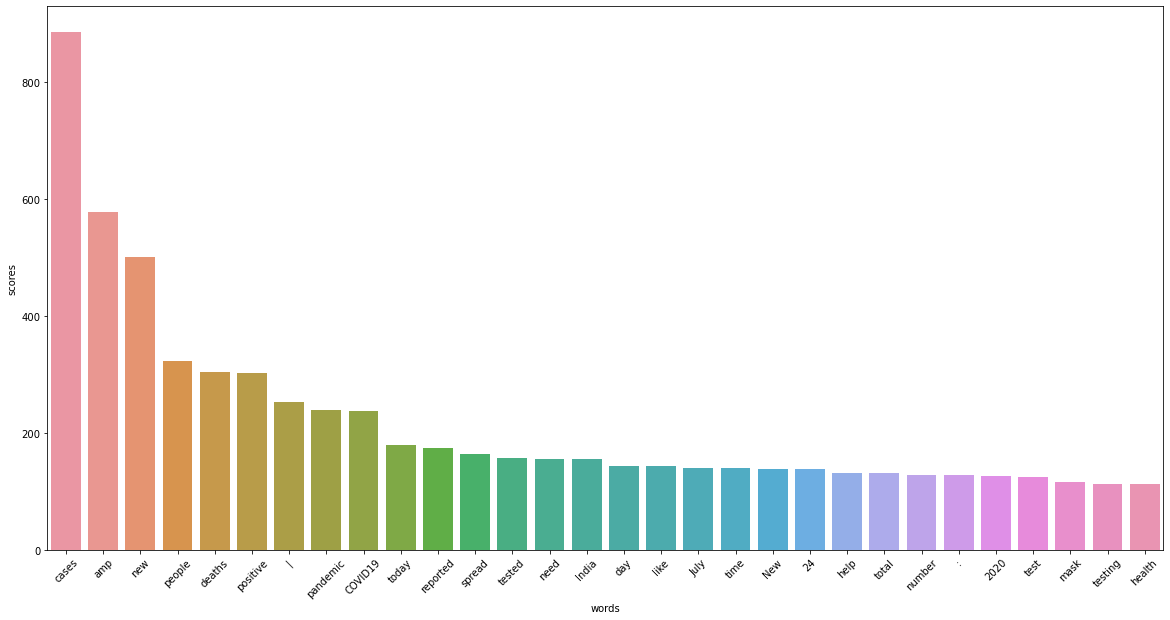

In [51]:
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='scores',data=neg_df)
plt.xticks(rotation=45)
plt.show()

In [52]:
!pip install wordcloud


In [53]:
### Word Cloud
from wordcloud import WordCloud

In [54]:
def plot_wordcloud(docx):
    plt.figure(figsize=(20,10))
    mywordcloud = WordCloud().generate(docx)
    plt.imshow(mywordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [55]:
pos_docx = ' '.join(pos_tokens)
neg_docx = ' '.join(neg_tokens)
neu_docx = ' '.join(neut_tokens)

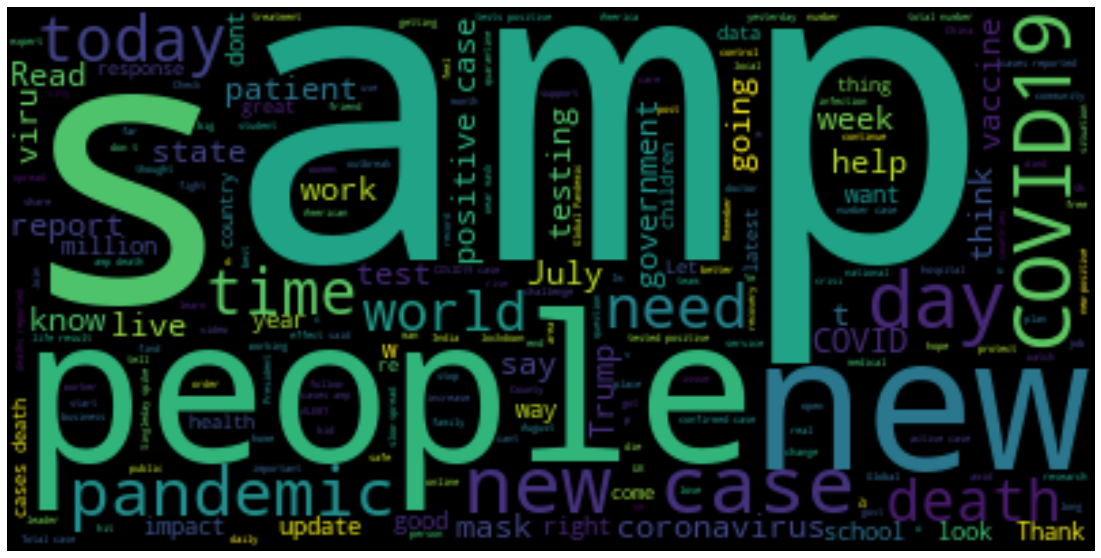

In [56]:
plot_wordcloud(pos_docx)

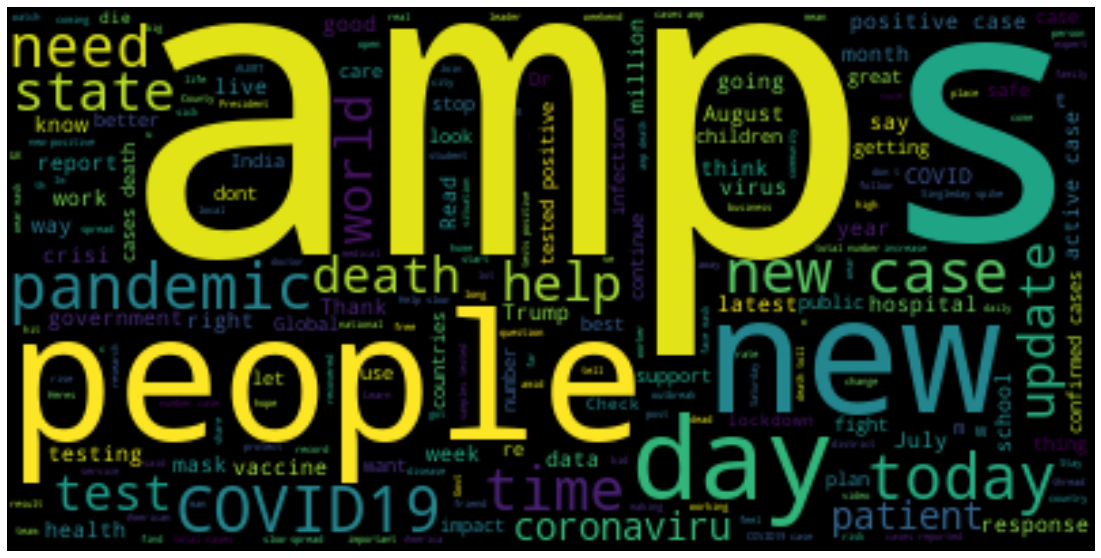

In [57]:
plot_wordcloud(neg_docx)

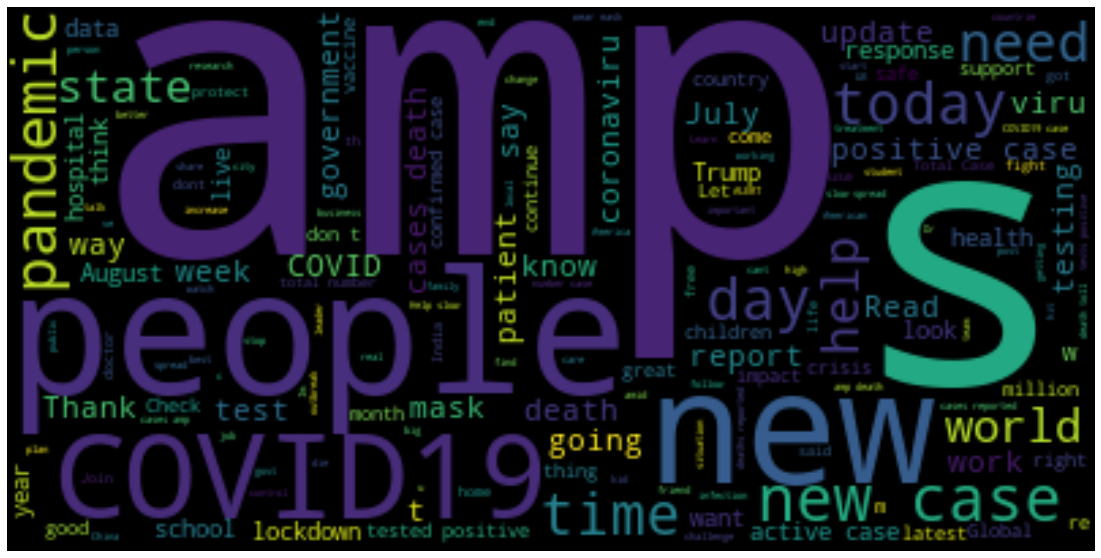

In [58]:
plot_wordcloud(neu_docx)

In [59]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

NameError: name 'stopwords' is not defined